In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
os.makedirs('./Graficos/', exist_ok=True)

# Dados

In [3]:
data = [
    [25, 3000, 1, 0],
    [30, 5000, 3, 1],
    [45, 8000, 5, 1],
    [22, 2000, 0, 0],
    [35, 6000, 2, 1],
    [40, 7000, 3, 1],
    [28, 4000, 1, 0],
    [50, 9000, 6, 1]
]
data = np.array(data)
data = pd.DataFrame(data, columns=['idade', 'renda', 'numero de compras', 'compra'])

In [4]:
data

,idade,renda,numero de compras,compra
0,25,3000,1,0
1,30,5000,3,1
2,45,8000,5,1
3,22,2000,0,0
4,35,6000,2,1
5,40,7000,3,1
6,28,4000,1,0
7,50,9000,6,1


# Separando Características e Alvo

In [5]:
X = data.drop('compra', axis=1).copy()
y = data['compra'].copy()

# Dividindo os dados em conjunto de treinamento e teste

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
X_train

,idade,renda,numero de compras
7,50,9000,6
2,45,8000,5
4,35,6000,2
3,22,2000,0
6,28,4000,1


In [8]:
X_test

,idade,renda,numero de compras
1,30,5000,3
5,40,7000,3
0,25,3000,1


In [9]:
y_train

7    1
2    1
4    1
3    0
6    0
Name: compra, dtype: int64

In [10]:
y_test

1    1
5    1
0    0
Name: compra, dtype: int64

# Ajustando o modelo

In [11]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Predições

In [12]:
y_pred = model.predict(X_test)

# Acurácia

In [13]:
accuracy = accuracy_score(y_test, y_pred)

In [14]:
print("Previsões:", y_pred)
print("Rótulos reais:", y_test.values)
print(f"Acurácia: {accuracy:.2f}")

Previsões: [0 1 0]
Rótulos reais: [1 1 0]
Acurácia: 0.67


# Plotando a árvore de decisão

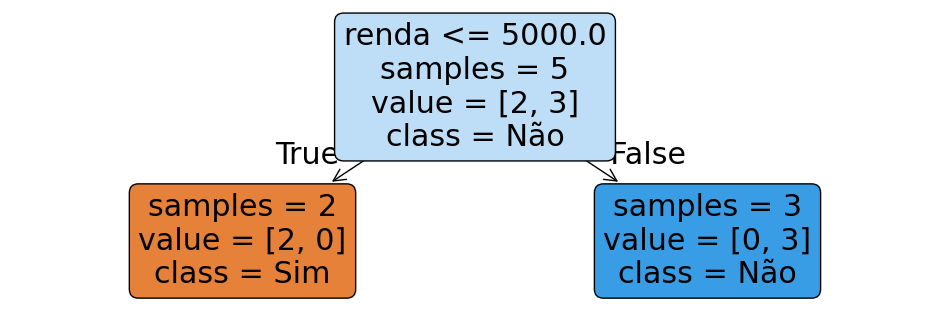

In [15]:
plt.figure(figsize=(12, 4))
plot_tree(model, filled=True, feature_names=['idade', 'renda', 'numero de compras anteriores'], class_names=['Sim', 'Não'], rounded=True, impurity=False)
plt.savefig('./Graficos/arvore.png', bbox_inches='tight')
plt.show()

In [16]:
model.feature_importances_

array([0., 1., 0.])

In [17]:
model.feature_names_in_

array(['idade', 'renda', 'numero de compras'], dtype=object)